In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
np.set_printoptions(linewidth = 200)

# with open('mlp_data.pkl', 'rb') as input:
#     mlp = pickle.load(input)

In [2]:
class MLP:

    def __init__(self, num_inputs=3, hidden_layers=[2], num_outputs=2):

        # Initiate array of layers size
        self.num_inputs = num_inputs
        self.hidden_layers = hidden_layers
        self.num_outputs = num_outputs

        # create a generic representation of the layers
        layers = [num_inputs] + hidden_layers + [num_outputs]

        # create random connection weights for the layers
        self.weights = [ (np.random.uniform(low = -0.5, high = 0.5, size = (layers[i], layers[i + 1]))) for i in range(len(layers) - 1)]

        # save derivatives per layer
        self.derivatives = [np.zeros((layers[i], layers[i + 1])) for i in range(len(layers) - 1)]

        # save activations per layer
        self.activations = [np.zeros(layers[i]) for i in range(len(layers))]

    
    def back_propagate(self, error, debug = False):

        for i in reversed(range(len(self.derivatives))):
            # If w2, take derivative of a3
            # define delta as: dE/da_(i+1) * s'(a_i+1)
            delta = error * self._sigmoid_derivative(self.activations[i+1])

            # Converts delta from array [0.1, 0.2] to 1x2 matrix [[0.1, 0.2]]
            delta_reshaped = delta.reshape(delta.shape[0],-1).T

            # get activations for current layer
            #current_activations = self.activations[i]

            # Converts a_i from array [0.1, 0.2] to 2x1 matrix [[0.1], [0.2]]
            current_activations = self.activations[i].reshape(self.activations[i].shape[0], -1)

            # Get the matrix of derivatives for W_i
            self.derivatives[i] = np.dot(current_activations, delta_reshaped)

            # error for prev layer as: dE/da_(i+1) * s'(a_i+1) * W_i or delta * W_i
            error = np.dot(delta, self.weights[i].T)

            if debug:
                print(f"Derivatives for W{i}: {self.derivatives[i]}")

    def forward_propagate(self, inputs):

        # Store the input layer activations
        activations = inputs
        self.activations[0] = activations

        for i in range(len(self.weights)):
            # Calculate inputs h
            net_inputs = np.dot(activations, self.weights[i])

            # if i == len(self.weights) - 1:
            #     #print('using sigmoid and soft')
            #     #print(net_inputs)
            #     #temp = self._sigmoid(net_inputs)
            #     #print(temp)
            #     activations = self._softmax(self._sigmoid(net_inputs))
            # else:
            # #     #print('using sigmoid')
            #     # Calculate the activations
            activations = self._sigmoid(net_inputs)

            # Save the activation for the current layer (if weights at W1, store a2)
            self.activations[i+1] = activations

        predictions = self._softmax(activations)
    
        return predictions


    def gradient_descent(self, learning_rate, debug = False):
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * self.derivatives[i]


    def train(self, inputs, targets, epochs = 10, learning_rate = 0.1, batch_size = 0):

        for i in range(epochs):
            sum_error = 0
            for j in range(len(inputs)):

                # Forward propagate
                output = self.forward_propagate(inputs[j])

                # Find derivative of loss function with respect to output layer
                loss_derivative = output - targets[j]

                # Back propagate to find the derivatives
                self.back_propagate(loss_derivative)

                # Gradient descent to update weights
                self.gradient_descent(learning_rate)

                # Calculate the error at this iteration
                sum_error += self._mse(targets[j], output)
            
            # report error
            print(f"Epoch {i}, Mean Squared Error: {sum_error/len(inputs)}")

    @staticmethod
    def _softmax(x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum()
    
    @staticmethod
    def _softmax_derivative(x):
        s = x.reshape(-1,1)
        return np.diagflat(s) - np.dot(s, s.T)

    @staticmethod
    def _mse(target, output):
        return np.average((target - output) ** 2)

    @staticmethod
    def _sigmoid_derivative(x):
        return x * (1.0 - x)

    @staticmethod
    def _sigmoid(x):
        return 1.0 / (1 + np.exp(-x))

In [3]:
# Load MNIST data
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train[12]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  12,  99,  91, 142, 155, 246, 182, 155, 155, 155, 155, 131,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 138, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 252, 210, 122,  33,   0

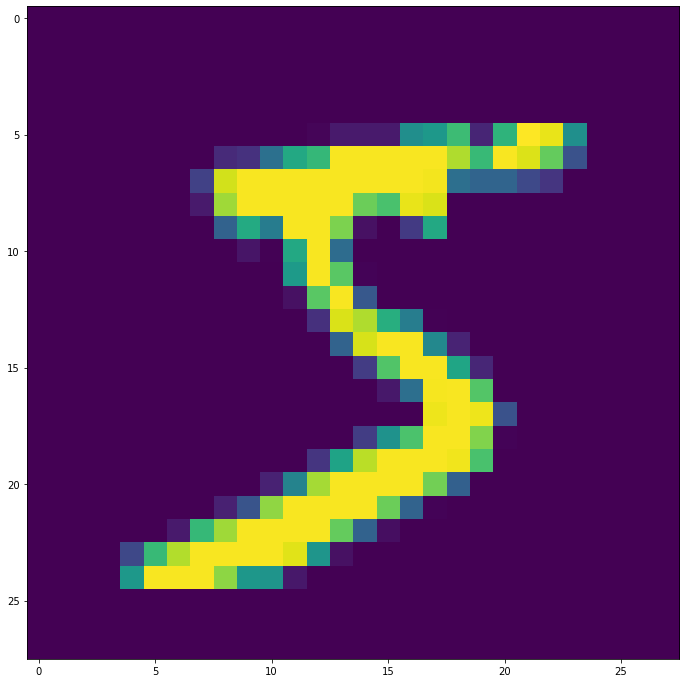

In [4]:
x_train_normalized = (x_train) / 255.0
x_test_normalized = (x_test) / 255.0
plt.figure(figsize=(12,12))
plt.imshow(x_train_normalized[0])

In [5]:
flattenedX = np.array([np.zeros(784) for _ in range(60000)])

for i in range(len(x_train)):
    flattenedX[i] = x_train_normalized[i].flatten()

In [6]:
one_hot_y = np.array([np.zeros(10) for _ in range(60000)])

for i in range(len(x_train)):
    one_hot_y[i][y_train[i]] = 1

In [7]:
#flattenedX[0]
one_hot_y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [8]:
mlp = MLP(784, [256], 10)

In [9]:
output = mlp.forward_propagate(flattenedX[1])
output

array([0.10210916, 0.12104045, 0.05637491, 0.05349797, 0.1213242 , 0.119246  , 0.14339455, 0.0850776 , 0.13034762, 0.06758755])

In [10]:
mlp.train(flattenedX, one_hot_y, epochs=1, learning_rate=0.1)

Epoch 0, Mean Squared Error: 0.06930210104986292


In [11]:
flattenedTest = np.array([np.zeros(784) for _ in range(10000)])

for i in range(len(flattenedTest)):
    flattenedTest[i] = x_test_normalized[i].flatten()

Prediction: 1, probability: 23.163115142725303%


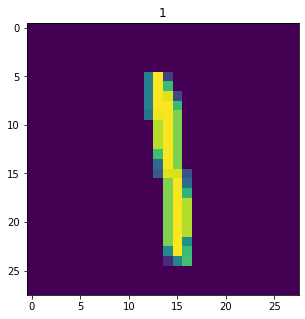

In [12]:
index = 2421

plt.figure(figsize=(5,5))
plt.imshow(x_test_normalized[index])
plt.title(y_test[index])

output = mlp.forward_propagate(flattenedTest[index])
prediction = np.argmax(output)
probability = output[prediction]

print(f"Prediction: {prediction}, probability: {probability * 100}%")

In [13]:
correct_predictions = 0

for i in range(len(flattenedTest)):
    output = mlp.forward_propagate(flattenedTest[i])
    prediction = np.argmax(mlp.forward_propagate(flattenedTest[i]))
    probability = output[prediction]
    if prediction == y_test[i]:
        correct_predictions +=1
    else:
        print(f"Expected value {y_test[i]} at index {i} ||| Given value: {prediction} with probability {probability}")

correct_predictions/len(flattenedTest)

Expected value 5 at index 8 ||| Given value: 6 with probability 0.21450328897788032
Expected value 3 at index 63 ||| Given value: 2 with probability 0.19853281298506067
Expected value 7 at index 80 ||| Given value: 9 with probability 0.19555048729705438
Expected value 7 at index 111 ||| Given value: 1 with probability 0.1914027189804308
Expected value 7 at index 124 ||| Given value: 4 with probability 0.19946751596604745
Expected value 2 at index 149 ||| Given value: 9 with probability 0.2037040177221028
Expected value 6 at index 217 ||| Given value: 5 with probability 0.19464434050118165
Expected value 8 at index 233 ||| Given value: 7 with probability 0.17010111795565896
Expected value 9 at index 241 ||| Given value: 8 with probability 0.11559188478754714
Expected value 3 at index 245 ||| Given value: 6 with probability 0.20725385827570045
Expected value 4 at index 247 ||| Given value: 2 with probability 0.18909261059172022
Expected value 6 at index 259 ||| Given value: 0 with probab

0.9337

In [14]:
import pickle

with open('weights_data.pkl', 'wb') as output:
    weights = mlp.weights
    pickle.dump(weights, output, pickle.HIGHEST_PROTOCOL)

In [15]:
with open('mlp_data.pkl', 'wb') as output:
    weights = mlp
    pickle.dump(weights, output, pickle.HIGHEST_PROTOCOL)